# The Normal Distribution

## Introduction

Quoting [Alon Amit's Quora post on the mathematical  constant $e$](https://www.quora.com/How-was-the-mathematical-constant-e-calculated-Why-is-it-important),
which is really about the $\exp$ (or exponential) function:

>The function

$$
𝑓(x) =1+ x +\frac{x^2}{2!}+ \frac{x^3}{3!} + \frac{x^4}{4!} + \dots
$$

>has been called by Rudin "the most important function in mathematics". It satisfies the simplest of differential equations:

$$
f' = f
$$
 
>from which all kinds of wondrous things follow, as I will attempt to show below.

>The function usually goes by the name  $\exp$, "the exponential function".   The value

$$
\exp\,(1) = e
$$

>is, indeed, one of the most important constants in math. The  exp
function can also be written as an actual exponent with base e:

$$
\exp\,(x)= e^{x}
$$

>But honestly, it's not so much the number $e$ that's so important. It's the function.

In this notebook we look at a close cousin of the $\exp$ function,
the normal distribution, and investigate how it relates to the
discrete distribution that best approximates it, the Bionomial Distibution.
One important reason to understand the relationship
is that we can have inutitions about how and why the
Binomial distribution works, and why it looks the way it looks,
which allows us then to have a better understanding of why
so many things in nature can be described with a normal
distribution.

The binomial distribution gives the probability of `n` successes in  `t` trials
for some random  variable `X` with two possible outcomes.  Say `X` is the result of flipping a not-quite 
fair coin ($p(\text{Heads}) =0.4$), and say we flip the coin 10 times and ask what is the probability
of 4 heads.  Then `n=4`, `t=10` and `p=0.4`.



The probability of that happening is

$$
{10 \choose 4}\, .4^{4} .6^{6}
$$

In [124]:
import scipy.misc


def binomial_prob (t,n,p):
    return scipy.special.comb(t,n) * p**n * (1-p)**(t-n)

binomial_prob(10,4,.4)

0.250822656

So if we do multiple experiments, flipping the coin 10 times in each experiment, we should get 4 heads roughly  one quarter of the time. For example, three experiment results might be:

In [126]:
from random import choice

def run_experiment(k):
    """
    Return the result of k coin flips as a string.
    
    choice(['H','T'])  flips the coin (virtually)
    """
    return ''.join([choice(["H","T"]) for i in range(k)])

print(run_experiment(10))
print(run_experiment(10))
print(run_experiment(10))

THTHHHHHTT
HTHTHHTTTH
THHHTTTTTH


And if we do it 100 times and keep track of how many times we get 4 Heads:

In [44]:
ctr,k = 0,4
verbose = False

for i in range (100):
    exp = run_experiment(10)
    h_count = exp.count("H")
    if verbose:
        print(f"{exp=} {h_count=}")
    if h_count == k:
        ctr += 1
print(f"\n{ctr=} ")


ctr=27 


##  The Discrete Case

`scipy.stats.binom.rvs(t,p,size=N)` makes collecting statistics like these
very easy.  It returns an array containing
the number of successes for $N$ simulated coin-flipping experiments,
where each experiment has $t$ coin flips and the probability of success is $p$.
It is a non-deterministic function that can return a different sequence
of results for each execution, just as the experiments above
each produced a different sequence of counts.

Hence `scipy.stats.binom.rvs(t,p,size=N)` does what is called **drawing** or **sampling** from the binomial distribution.

In the next cell we do the equivalent of calling:

```python
r = scipy.stats.binom.rvs(300,.4,size=1_000_000)
```

So `r` is an array of length 1,000,000 
containing the number of successes in 1,000,000 experiments;
each experiment consists of 300 coin tosses
with the probability of a success (say, Head) being .4.  
Each of the elements of `r` is an integer which could in principle
fall between 0 and 300, but in practice falls in
roughly the range between 80 and 160.

In the plot on the left below,  we do a **histogram** summarizing `r`; the x-axis
represents what have been calling $n$, the number of
successes in an experiment:
A (very narrow) bar is drawn at $n$ to the height $y$ if y of the N experiments had $n$ successes.

This looks very much like the celebrated **Bell Curve** associated with
the **Normal (or Gaussian) Distribution.**  Actually it is not quite
that, as we will see, but it is a good approximation, and we can learn some
important properties of a normal distribution from the binomial distribution.

The values for $y$ could in principle range from 0 to 1,000,000,
but in practice the maximum $y$ is about 47,000 and is
reached at around $n = 120$. That is what the success probability
of .4 leads us to expect.  That is,

$$
.4 \times 300 = 120.
$$

We may expect around 120 Heads, but that is not what we always get.  We sometimes
get more; we sometimes get less.  Part of the interest of the histogram is that it
shows what a probability model is.  The probability of Heads is .4, 
but that doesn't mean we always get 120 Heads.  It just means that over the
long run, that is teh most likely thing to happen.

Moreover, as the number of successes $n$ gets further away 
from 120 in either direction, fewer and fewer experiments have $n$ successes.  That
is what creates the bell shape. A bell curve has that  **mean** value where the counts
peak, and the further away we get from that mean the lower the counts get.

The plot on the right shows that the counts we get
from our sampling process are almost exactly in accordance with the
probability formula for the binomial experiments. That is, we plot 
the expected frequency for $n$ successes against  $n$.
The expected frequency for $n$ successes is
$N$ times the probability of $n$ successes.

So in this case, the bell-shape is a consequence of the formula for the probability 
of a particular number of successes, which peaks at our mean 120, and dwindles
and we move from it.

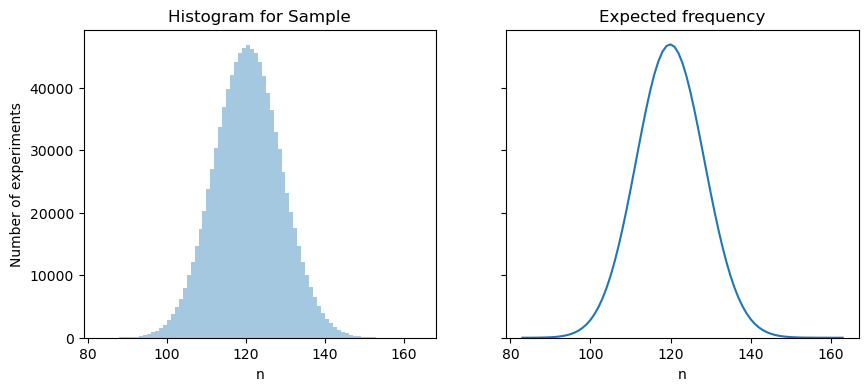

In [61]:
from scipy.stats import binom
from matplotlib import pyplot as plt

    
N = 1_000_000  # Number of experiments
# trials: Number of coin flips in each experiment
# p is the probability of success (e.g., Heads) for each flip
trials, p = 300, 0.4
dist = binom(trials, p)

# Sample N "Random Variates"  from the distribution dist
random_state = 49
r = dist.rvs(N,random_state=random_state) 

# Alternatively we may directly create a sample
#r = binom.rvs(trials, p, size=N,random_state=random_state)

# How many integer values do we have actually have data for?
bins = (r.max() - r.min())

# (x,y): y of the N trials had x successes
# max y is reached at x = 120 (consistent with bins=300, p=.4)

# Plot
fig, (ax1,ax2)  = plt.subplots(1, 2, figsize=(10,4),sharey=True)

#  p very close to 0 for n<80 or n>160  so we restrict attention to that interval
(X,bin_edges,_) = ax1.hist(r,bins=bins,alpha=.4)
# Try this for a histogram where you can the individual bars
# It creates a number of bins with nothing in them.
#(X,bin_edges,_) = plt.hist(r,bins=300,alpha=.4)
ax1.set_xlabel("n")
_ = ax1.set_ylabel("Number of experiments")
_  = ax1.set_title("Histogram for Sample")

#  Now plot the predicted frequencies
f = lambda n : binomial_prob (trials,n,p)

xvals = np.arange(r.min(), r.max())
_ = ax2.plot(xvals,N*f(xvals))
_ = ax2.set_xlabel("n")
_  = ax2.set_title("Expected frequency")

The data:  a sequence of integers, each representing the number of heads obtained from 300 coin tosses,

In [70]:
r[:10]

array([124, 104, 115, 132, 120, 130, 123, 123,  98, 127])

The maximum count in our histogram; the sample mean.

In [72]:
# max and mean using our histogram counts
X.max(), r.min() + X.argmax()

(46875.0, 120)

In [43]:
len(X)

81

In [42]:
len(X[X>0])

79

Now let's look at one case to illustrate what the plot on the right shows.

According to the binomial probability formula, what is the probablity of getting exactly 100 Heads?

In [12]:
binomial_prob (300,100,.4)

0.002852068542699302

So in roughly 3 out of every 1,000 experiments in which we toss a coin 300 times,
we will get exactly 100 heads.

Now let's check whether our sampling processes respects that prediction.

In [5]:
(r==100).sum()/N

0.00284

As expected, the proportion of experiments in which there are exactly 100 heads agrees
with the probability formula.  It is about 3 in 1,000.

The match between the histogram on the left and the expected frequency plot on the right shows
that this agreement extends across the range of experiment outcomes in the sample.

We are getting $n$ heads in about the proportion we would expect from the probability formula.

Using the standard formula for a sample standard deviation, the standard deviation is  ~ 8.5.

That is:

In [118]:
import numpy as np

mn = r.mean()
ddof = 1
nmlzr = len(r) - ddof
sigma_prime = np.sqrt(((r - mn)**2).sum()/nmlzr)
sigma_prime

8.50140359437859

Normally you would compute this using the `.std()` method on the data array.

In [123]:
r.std(ddof=1)

8.501395092962245

Now the Binomial Distribution has its own formula for the standard deviation, which depends only on
the experiment parameters $n$ and $trials$, and is in pretty good
agreement with the sample SD.

In [110]:
np.sqrt(p*(1-p)*trials)

8.48528137423857

Some other stats from our sample:

In [221]:
print(f"Max: {r.max():d} Min: {r.min():d} Mean: {r.mean():.2f} STD: {r.std():.2f}")

Max: 164 Min: 83 Mean: 120.01 STD: 8.50


Note that even though we did 1,000,000 experiments, we only got `r.max()` heads once,
since we are far out on the tail of the bell curve.

In [195]:
(r == r.max()).sum()

1

## The Continuous Case

The Binomial distribution is the discrete probability distribution that
best approximates the Normal distrubution.  To see what that
means, let's come as close as we can to repeating the experiment 
above using  `scipy.stats.norm`, which provides functionality for various aspects of a continuous normal distribution.

In particular,  it can draw a random sample from a continuous normal distribution.
A normal distribution is completely determined by fixing the **mean** ($\mu$)
and the **standard deviation** ($\sigma$); it can be described via  the function $f$
given by:

$$
(1) \,\, f(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}\,\exp-\frac{1}{2}\left({\frac{x-\mu}{\sigma}}\right )^{2}
$$

This is a cousin of the exp function which gives what is called
the **probability density** function of the continuous normal distribution.
To compute probabilities from a probability density function $f$
we choose an interval and integrate $f$ over that interval. To
do this in the `scipy.stats.norm` implementation we use the **cumulative
density function**, `scipy.stats.norm.cdf`, which is a function
of one argument; `cdf(x)` integrates $f$ in the
interval between 0 and $x$.  To compute the  probability of 
falling in the interval $[x,\, x+\epsilon]$, we do

$$
\text{cdf}(x + \epsilon) - \text{cdf}(x)
$$

The connection of $f$ to the discrete binomial distribution
will become apparent visually in the plot below.  The proof of the relationship,
known as **The Central Limit Theorem** is another matter; in fact the
relationship we're directly concerned with is a special case of the Central
Limit Theorem known as the De Moivre-Laplace Theorem.  We will sketch
some key ideas below.

For sampling, we'll use the same $N$ for the binomial distribution above. We also
need to know the mean $\mu$ and the standard deviation $\sigma$.

We'll compute $\sigma$ and $\mu$
using the $p$ and $trials$ we used above, using the standard formulas for a binomial distribution.  See, for example [stats.libretext.org](https://stats.libretexts.org/Courses/Highline_College/Book%3A_Statistics_Using_Technology_(Kozak)/05%3A_Discrete_Probability_Distributions/5.03%3A_Mean_and_Standard_Deviation_of_Binomial_Distribution).

In [130]:
# from matplotlib import pyplot as plt

import numpy as np
from scipy.stats import norm, binned_statistic 

# To reproduce above
trials, p = 300, .4


# Find mu and sigma as determined by our binomial experiment parameters: trials and p
mu = p  * trials  #  120
sigma = np.sqrt(p*(1-p)*trials)  # ~ 8.5



# Define a normal distribution instance
# scipy docs call this an "RV" (Random Variates [generator]) object
norm_inst = norm(loc=mu,scale=sigma)

# get a sample of the desired size
N = 1_000_000
fac = 1
#fac = 10
N *= fac
# random state: fixing the random variates for successive attempts
# (lessen plot tinkering)
random_state = 47
sample = norm_inst.rvs(N,random_state=random_state)

#  Alt way of generating sample
#X=np.random.randn(N)
#sample = (sigma * X) + mu
#X.sort()


We now have a sample.  Note that unlike our sample `r` above, it is not limited to integers.

In [131]:
sample[:10]

array([112.80440099, 131.0809829 , 127.84216464, 125.43407433,
       111.05025992, 135.25450551, 111.40621945, 126.98867565,
       117.49980884, 114.97272049])

These are not counts of successful coin flips.  These are numbers on some continuous
scale, say height measurements in centimeters.  We have defined them to be drawn
from a continuous normal distribution with mean 120 and standard deviation ~ 8.5,
so as the measured result gets further away from 120, it will be less and less
probable:

A little more than half the sample is less than 120

In [133]:
(sample < 120).sum()/N

0.499269

Less than 1% of the sample is less than 100

In [134]:
(sample < 100).sum()/N

0.009083

Similarly, less  than 1% of the sample is greater than 140.

In [135]:
(sample > 140).sum()/N

0.009173

Here are some statistics for the sample. Note that they greatly resemble the statistics we got for our discrete sample `r`:

In [136]:
print(f"Max: {sample.max():.2f} Min: {sample.min():.2f} Mean: {sample.mean():.2f} STD: {sample.std():.2f}")

Max: 160.20 Min: 82.05 Mean: 120.01 STD: 8.48


As a result `sample` will  yield the histogram  shown in the left plot,
which is virtually identical to the histogram above,
Note that we choose the number of histogram bins in exactly the same way we did above,
by using the width of the range between the miminum and maximum
sample values.
 
On the right, we call the `scipy.stats.cdf` function to compute the
expected frequency, using our bin means and bin widths to define the intervals
over which we calculate the expected frequencies.

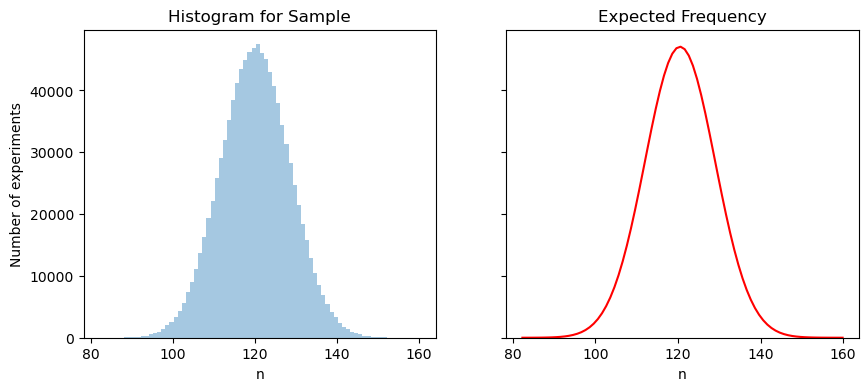

In [137]:

#  How to exactly match the first plot.  Since we sampled from a continuous dist,,
#  we'd like to choose the number of histogram bins
#  so as to  roughly match the number of experiments at the mean in the 1st plot. 
#  This rather natural choice gets bin edges that yield a good approx. of the histogram above.
bins = round(np.nanmax(sample) - np.nanmin(sample))

# Plot
fig, (ax1,ax2)  = plt.subplots(1, 2, sharey=True, figsize=(10,4))

# Find evenly spaced bin edges for data given how many we want 
# We can have ax1.hist() do this for us, but this function gives us bin means we'll
# use in 2nd plot
bin_means, bin_edges, _bin_numbers = binned_statistic(sample, sample, bins=bins)
(X2,bin_edges2,_) = ax1.hist(sample, bins=bin_edges, histtype='stepfilled', alpha=0.4)
# Or if no bin_means are needed, just pass the integer bins directly as the bin parameter to .hist()
#ax1.hist(sample,bins=bins, histtype='stepfilled', alpha=0.4)
ax1.set_xlabel("n")
ax1.set_ylabel("Number of experiments")
ax1.set_title("Histogram for Sample")

##########################################################################################
#  Plotting expected frequencies given norm_inst: a normal dist with sigma, mu
##########################################################################################

#  Assigning probs to bin medians using 
# bin_width: bin edges are evenly spaced
# bin_width turns out to be very close to 1
bin_width = bin_edges[1] - bin_edges[0]
# for each bin mean mu0: prob of falling in the interval [mu0-bin_width,mu0]
ps = norm_inst.cdf(bin_means) - norm_inst.cdf(bin_means-bin_width)

# Plot expected frequency in N experiments
_ = ax2.plot(bin_means, N * ps, c="r")
_ = ax2.set_xlabel("n")
_ = ax2.set_title("Expected Frequency")

Coding note:  We can also sample a normal distribution
via numpy's `np.random.randn(N)` which doesn't allow specifying $\sigma$
and $\mu$.  Specifically,
`np.random.randn(N)` returns an array of N values 
drawn from a normal distribution with mean 0 and standard deviation 1.

For sampling from the normal distribution with mean $\mu$ and standard deviation $\sigma$, use:

$$
(\sigma * \text{np.random.randn(N)}) + \mu .
$$

## The relation between the Binomial Distribution and the Normal Distribution

In the continuous case, the objects we are talking about have changed.  What we called an experiment in
the discrete case has been replaced by a measurement in the continuous case.  That is, one experiment
of flipping 300 coins with a probability of success of .4 corresponds to one height measurement
from a population whose mean height is 120 (= $np$ = $300 \times .4$) and height standard deviation
is  $\sqrt{np(1-p)}$ = $\sqrt{.4 \times .6 \times 300}$.

On the one hand we have integers, on the other continuous real numbers.  It is a kind of mathematical marvel that these two kinds of data should have such similar
probability models, and it is the task of the Central Limit Theorem to not only show that this
is the case, but to show why this is the case.

We'll make some mathematical remarks shortly, but let's talk about what the two cases have in common
first.  In both cases we have a function of something -- let's call it an event -- which produces a
number that can be assigned a probability by a probability model.  In the discrete case we have coin flipping experiments with known $n$ and $t$
as our events; the number produced is the number of Heads; the 
probability model is the binomial probability function. In the  continuous case,
the event is a height measurement from a population whose heights have 
a known $\mu$ and $\sigma$; the probability model is the normal
distribution consistent with the population properties.  

Above we used the probability models to compute expected frequencies to get something we could compare with
our histograms.  But we turn now to understanding the relationship
of the two probability models, so let's leave $N$, the sample size or the number of experiments,
out of it, and investigate the probability models alone.  The plot below
does a little relabeling for purposes of aligning with textbook discussions.
In the context of the binomial probability distribution, we'll
call the number of trials $n$ and the number of successes $k$.

So

$$
\text{binomial_prob }(n,k,p)
$$

is the probability of $k$ successes in $n$ trials with $p$ the probability of a single success.

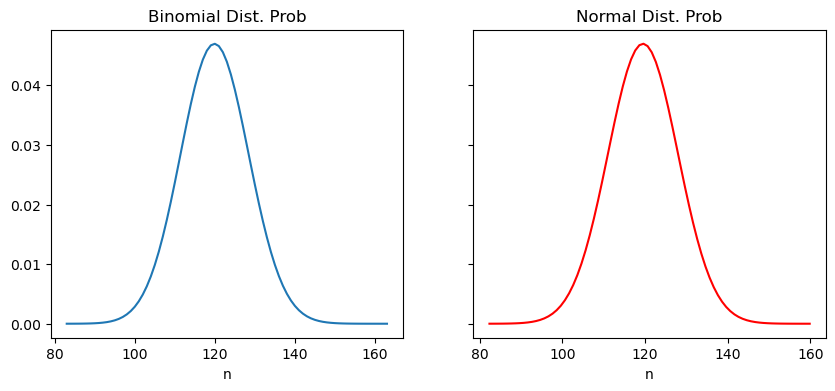

In [196]:
# Plot
fig, (ax1,ax2)  = plt.subplots(1, 2, sharey=True, figsize=(10,4))

#  Now plot the predicted frequencies
# Relabeling for discussion
n  = trials
g = lambda k : binomial_prob (n,k,p)

xvals = np.arange(r.min(), r.max())
_ = ax1.plot(xvals,g(xvals))
_ = ax1.set_xlabel("n")
_  = ax1.set_title("Binomial Dist. Prob")


# for each x: prob of falling in the interval [x, x+1]
f = lambda x: norm_inst.cdf(x+1) - norm_inst.cdf(x)

_ = ax2.plot(bin_means, f(bin_means), c="r")
_ = ax2.set_xlabel("n")
_ = ax2.set_title("Normal Dist. Prob")

Though the two function plots look alike, they are not, in fact equal.  For example:

In [197]:
f(100)

0.003361317859629183

In [198]:
g(100)

0.002852068542699302

## De Moivre-Laplace Theorem

All we can truthfully say is that $g$ provides a good approximation of $f$.  What
the De Moivre-Laplace Theorem says is that as $n$ increases, the approximation
grows better and better. The following sketch follows closely
[Wikipedia page for that Theorem.](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem)
We prove that as $n$ grows,  $f$ grows closer and closer to $g$.

$$
(2)\,\, g = {n \choose k} p^{k} q^{n-k}  \approx
\frac{1}{\sqrt{2\pi{npq}}}\,\exp-\frac{1}{2}\left({\frac{k-np}{npq}}\right )^{2} = f
$$

We assume

$$
\begin{array}[t]{lcl}
p + q &=& 1\\
p,\,q &>& 0\\
n &>& k
\end{array}
$$

In this proof sketch, we will fix $p$ and $q$,
think of both $f$ and $g$ as functions of a single variable $k$.


### Part One

A fact which makes life much simpler 
is that the continuous normal distribution in (1) is the unique solution
to the following differential equation 

$$
(3)\,\, f'(k)  = - \frac{k  - \mu}{\sigma^{2}} f(k) 
$$

which meets the initial condition

$$
\int_{-\infty}^{\infty} f(k) \, dk = 1.
$$

You can verify that $f$ is a solution by differentiating (1) and substituting
into (3).  The initial condition is an axiom of probability combined
with definition of a probability density function.
For our purposes we can rewrite (3) as 

$$
(3')\,\, f'(k)  = - \frac{k  - np}{npq} f(k) 
$$

We will be looking at the properties of $f$ and $g$  as $n$ varies.

So, writing the binomial probability function as $g$,  it is enough to show that as $n$ grows large, 

$$
\frac{g'(k)}{g(k)}  = - \frac{k  - np}{npq},
$$

to show that  $g$ converges to $f$.

But how do we take the derivative of a function defined only for integers?  We use [the **discrete or difference
derivative**](https://calculus.subwiki.org/wiki/discrete%20derivative)

$$
 g'(k) = \frac{g(k+1) - g(k)}{1} = g(k+1) - g(k)
$$

As $k$ grows large, the difference derivative becomes the derivative.  We want to show
that for large $n$:

$$
(4)\,\,\frac{g(k+1) - g(k)}{g(k)} \cdot - \frac{npq}{k-np}  \rightarrow 1
$$

Using the binomial probability formula, it is not very difficult to show:

$$
\frac{g(k+1)}{g(k)} = \frac{(n-k)\,p}{(k+1)\,q} 
$$

Then we have:

$$
{\large \begin{array}[t]{lcl}
\frac{g(x+1) - g(x)}{g(x)} &= &\frac{(n-k)p}{(k+1)q} - 1\\
 & = & \frac{np - kp}{kq + q} - \frac{kq + q}{kq + q}\\
 & = & \frac{np - kp -kq - q}{kq + q}\\
  & = & \frac{np - k - q}{kq + q}
\end{array}}
$$

We can now write the left hand side of  (4) as

$$
(4')\,\,   \frac{np - k - q}{kq + q}  \cdot - \frac{npq}{k-np} 
$$

### Part Two

Next we rewrite $k$ in terms of $c$, the number of standard deviation units $k$ lies from the mean $np$. 

$$
(A)\,\,k=np+c{\sqrt {npq}}
$$

$$
k=np+c{\sqrt {npq}} \,\, \longrightarrow \,\, - \frac{npq}{k-np} = \frac{\sqrt{npq}}{-c}
$$ 

Substituting for $k$ in (4'):

$$
\frac{np - (np+c{\sqrt {npq}}) - q}{(np+c{\sqrt {npq}})q + q}  \cdot  \frac{\sqrt{npq}}{-c} 
$$

$$
\frac{-c{\sqrt {npq}} - q}{npq+cq{\sqrt {npq}} + q}  \cdot \frac{\sqrt{npq}}{-c} 
$$

$$
(6) \,\, \frac{-c{{npq}} - q\sqrt {npq}}{-cnpq - c^{2}q{\sqrt {npq}} - cq}  
$$

Note that as $n$ grows the $-cnpq$ terms in
the denominator and numerator dominate all others so that 

$$
\lim_{n\rightarrow \infty} \frac{-c{{npq}} - q\sqrt {npq}}{-cnpq - c^{2}q{\sqrt {npq}} - cq}  = 1
$$

This essentially completes the proof. There are a few things to tidy up.

First we illustrate the convergence just proved with some actual values.  We choose a $k$ 3 and one-quarter standard deviations from the mean (so $c$ = 3.25), with $p$ set to .4 (meaning $q$ is .6). We call the
function implementing (6) `six`:

In [281]:
c,p,q = 3.25,.4,.6

def six (n):
    cnpq = -(c*n*p*q)
    rt_npq  = np.sqrt(n*p*q)
    return (cnpq - q*rt_npq)/(cnpq - c**2*q*rt_npq - c*q)


print (f"{'n':>9}         {'six(n)':>11}\n")

for n in [10**i for i in range(14)]:
    print(f"{n:<18,}    {six(n):.6f}")

        n              six(n)

1                     0.184060
10                    0.446112
100                   0.729202
1,000                 0.896794
10,000                0.965112
100,000               0.988722
1,000,000             0.996408
10,000,000            0.998862
100,000,000           0.999640
1,000,000,000         0.999886
10,000,000,000        0.999964
100,000,000,000       0.999989
1,000,000,000,000     0.999996
10,000,000,000,000    0.999999


This convergence obtains for any value of $c$, $p$, or $q$, and therefore we have sketched how
the left hand side of (6) converges to 1.  Now for this
to seal the deal, (4') must be exactly equivalent to (6).
The issue is that $g$ is defined for only integer values of $k$.

Now for many values of $n$, $p$, $q$, and $c$,  $k$ is not an integer.
For example, for our chosen value of $p$, with 

In [240]:
n, c

(10000000000000, 3.25)

we have, for $k$:

In [238]:
k = n*p + c*np.sqrt(n*p*q)
k,round(k)

(4000005034878.35, 4000005034878)

Thus (6) is only an approximation of (4').  In this case, it is a fairly good approximation
of (4') when $k=4000005034878$.  This "rounding error" is bounded to $\frac{0.5}{\sqrt{npq}}$;
with $n$ in the denominator, this quantity vanishes as $n$ grows large. In other words,
what we called `h(n)` above is a better and better approximation of (4').  We illustrate
that, using the same values as above

In [ ]:
c,p,q = 3.25,.4,.6
#c,p,q = 2.7,.25,.75


def four_prime (n):
    """
    from (4')
    """
    mu = n*p
    sigma_sq = mu*q
    k = round(mu + c*np.sqrt(sigma_sq))
    p1 = (mu - k - q)/(k*q + q)
    p2 = - sigma_sq/(k-mu)
    return p1 * p2

In [282]:
four_prime (n), six(n)

(0.999998860450411, 0.9999988604503152)

Let's watch the approximation improve as $n$ grows:

In [288]:
print (f"{'n':>10}         {'six(n)':>11}  {'four_prime(n)':>16} {'err':>7}\n")

for n in [10**i for i in range(15)]:
    err = np.abs(four_prime(n) - six(n))
    print(f"{n:<19,}    {six(n):.7f}    {four_prime(n):.7f} {err:>12.2e}")

         n              six(n)     four_prime(n)     err

1                      0.1840598    0.1833333     7.26e-04
10                     0.4461115    0.4480000     1.89e-03
100                    0.7292015    0.7280702     1.13e-03
1,000                  0.8967937    0.8975610     7.67e-04
10,000                 0.9651117    0.9651669     5.52e-05
100,000                0.9887217    0.9887348     1.30e-05
1,000,000              0.9964082    0.9964087     4.57e-07
10,000,000             0.9988616    0.9988616     3.32e-08
100,000,000            0.9996398    0.9996398     8.66e-09
1,000,000,000          0.9998861    0.9998861     5.92e-10
10,000,000,000         0.9999640    0.9999640     4.56e-11
100,000,000,000        0.9999886    0.9999886     4.52e-12
1,000,000,000,000      0.9999964    0.9999964     9.11e-13
10,000,000,000,000     0.9999989    0.9999989     9.58e-14
100,000,000,000,000    0.9999996    0.9999996     8.88e-15


The attentive reader may have noted that `four_prime(n)` is alternately smaller and larger than the
quantity it is approximating.  This is okay as long as the absolute value of the difference
dwindles, and it does ultimately (in fact always, except between $n=1$ and $n=10$).  The important thing is that the error bound guarantees that if (6) vanishes with large $n$, so does (4').  That completes the proof sketch.

## Summary

What the De Moivre-Laplace Theorem Laplace Theorem tells us is that as the number of
trials $n$ grows large, theBonomial Distribution is a better and better approximation of the Noraml Distribution.

Visually, we can see that by placing a histogram with our original number of trial (300) beside one
with 30,000 trials.  

In [156]:
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np

def get_binomial_dist_sample (n,p,N,random_state=49):

    dist = binom(n, p)

    # Sample N "Random Variates"  from the distribution dist
    return dist.rvs(N,random_state=random_state) 

N, p = 1_000_000, .4
#num_stds = 5
num_stds = 4.75
n1 = 300
random_state = 49
print(f"Getting n={n1:>6,} sample")
r1 = get_binomial_dist_sample (n1, p, N,random_state=random_state)
#bins1 = (r1.max() - r1.min())
mu1,sigma1 = r1.mean(), r1.std()
#bins1 = (r1.max() - r1.min())
bins1 = round(mu1 + num_stds*sigma1)- round(mu1 - num_stds*sigma1,)

#  Now plot with trials set to 1000 
n2=3_000_000
print(f"Getting n={n2:>6,} sample")
r2 = get_binomial_dist_sample (n2, p, N)

mu2,sigma2 = r2.mean(), r2.std()

#bins2 = round(mu2 + num_stds*sigma2)- round(mu2 - num_stds*sigma2,))
f = lambda x: .1 * x
#f = lambda x: np.sqrt(x)
bins2 =  round(f((mu2 + num_stds*sigma2)- (mu2 - num_stds*sigma2)))

Getting n=   300 sample
Getting n=3,000,000 sample


In [102]:
r1.mean()/r2.mean(),r2.std(),(r1.std()/r2.std())**2

(0.0010001167243569103, 268.5607365689071, 0.0010020627701385915)

In [157]:
bins1,bins2

(80, 807)

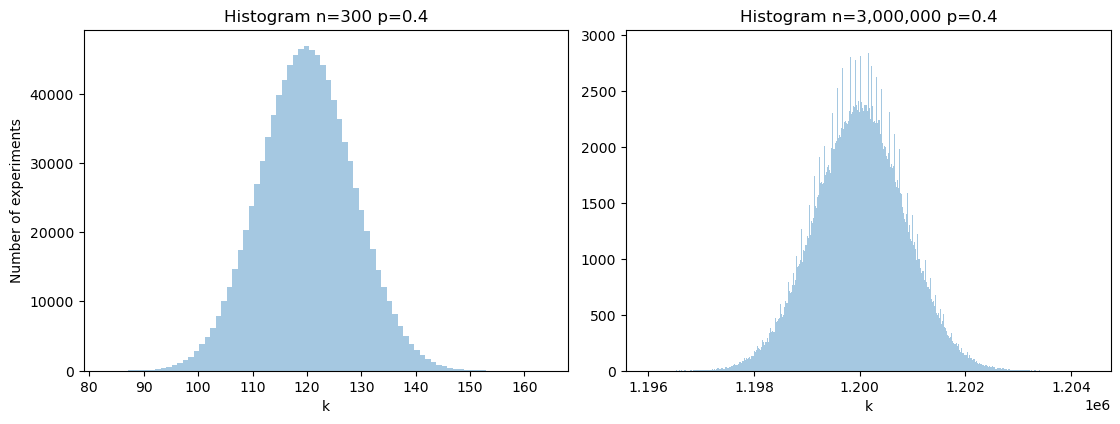

In [158]:
# Plot
#bins1, bin2 = 80, 500
#bins2 = round(.25 * bins2)
bins2 *= 2
fig, (ax1,ax2)  = plt.subplots(1, 2, figsize=(11,4))
plt.tight_layout()
# plot for n= 300
(X1,bin_edges1,_) = ax1.hist(r1,bins=bins1,alpha=.4)
_ = ax1.set_xlabel("k")
_ = ax1.set_ylabel("Number of experiments")
_  = ax1.set_title(f"Histogram n={n1:,} {p=}")



#  p very close to 0 for n<80 or n>160  so we restrict attention to that interval
(X2,bin_edges2,_) = ax2.hist(r2,bins=bins2,alpha=.4)

# plot for n= 1_000
_ = ax2.set_xlabel("k")
#_ = ax2.set_ylabel("Number of experiments")
_  = ax2.set_title(f"Histogram n={n2:,} {p=}")

We have kept N, the number of experiments, the same in both histograms. But when $n=30,000$ the values
on the x-axis are spread over a much wider range (when n=300, $\sigma=8.5$; when n=30,000, $\sigma=85$).
Therefore the number of experiments that land on a particular $k$-value goes down.  So the resolution is
decreases in the x-direction and increases in the y direction

??? Discussion needs to include Bin size ???

The jaggedness decreases considerably, even though 

In [140]:
1000*r1.sum()

120014274000

In [131]:
r2.sum()

120000267046